## Library included:

In [1]:
import tensorflow as tf

## Content

1. 自制数据集，解决本领域应用。<br>
2. 数据增强，扩充数据集。<br>
3. 断点续训，存取模型。<br>
4. 参数提取，把参数存入文本。<br>
5. acc/loss可视化，查看训练效果。<br>
6. 应用程序，给图识物。<br>

原版结构：

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)

model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2562 - sparse_categorical_accuracy: 0.9281 - val_loss: 0.1321 - val_sparse_categorical_accuracy: 0.9602
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1125 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9706
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0781 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0814 - val_sparse_categorical_accuracy: 0.9754
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0577 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0747 - val_sparse_categorical_accuracy: 0.9764
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0451 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9753
Model: "sequential"


## 利用数据/图片自制数据集并使用
将找到的图片、数据等进行处理，并存储成.npy文件，方便以后快速导入。

In [3]:
from PIL import Image
import numpy as np
import os

# 数据来源位置
train_path = './class4/MNIST_FC/mnist_image_label/mnist_train_jpg_60000/'
train_txt = './class4/MNIST_FC/mnist_image_label/mnist_train_jpg_60000.txt'
test_path = './class4/MNIST_FC/mnist_image_label/mnist_test_jpg_10000/'
test_txt = './class4/MNIST_FC/mnist_image_label/mnist_test_jpg_10000.txt'

# 处理好后的数据集位置
x_train_savepath = './class4/MNIST_FC/mnist_image_label/mnist_x_train.npy'
y_train_savepath = './class4/MNIST_FC/mnist_image_label/mnist_y_train.npy'
x_test_savepath = './class4/MNIST_FC/mnist_image_label/mnist_x_test.npy'
y_test_savepath = './class4/MNIST_FC/mnist_image_label/mnist_y_test.npy'

def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        #print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    print('finished')
    return x, y_  # 返回输入特征x，返回标签y_

# 之后正常训练操作

In [4]:
# 若没有数据集，就从原数据建立，有就直接导入使用
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

-------------Load Datasets-----------------


## 数据增强（增大数据量）

```python
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 所有数据将乘以该数值
    rotation_range= 随机旋转角度数范围
    width_shift_range= 随机宽度偏移量
    height_shift_range= 随机高度偏移量
    水平翻转：horizontal_flip= 是否随机水平翻转
    随机缩放：zoom_range= 随机缩放的范围[1-n，1+n])
image_gen_train.fit(x_train)

例：

image_gen_train = ImageDataGenerator(
    rescale=1. / 1., # 如为图像，分母为255时，可归至0～1
    rotation_range=45, # 随机45度旋转
    width_shift_range=.15, # 宽度偏移
    height_shift_range=.15, # 高度偏移
    horizontal_flip=False, # 水平翻转
    zoom_range=0.5 # 将图像随机缩放阈量50％)

image_gen_train.fit(x_train)
```

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 最后的 1 是单通道数据，是灰度值
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度,从(60000, 28, 28)reshape为(60000, 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test),
          validation_freq=1)
model.summary()

Train for 1875 steps, validate on 10000 samples
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 1.4042 - sparse_categorical_accuracy: 0.5477 - val_loss: 0.4637 - val_sparse_categorical_accuracy: 0.8912
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9475 - sparse_categorical_accuracy: 0.7086 - val_loss: 0.3171 - val_sparse_categorical_accuracy: 0.9230
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8315 - sparse_categorical_accuracy: 0.7478 - val_loss: 0.2860 - val_sparse_categorical_accuracy: 0.9238
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7664 - sparse_categorical_accuracy: 0.7693 - val_loss: 0.2536 - val_sparse_categorical_accuracy: 0.9287
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7230 - sparse_categorical_accuracy: 0.7818 - val_loss: 0.2299 - val_sparse_categorical_accuracy: 0.9326
Model: "sequential_1"
____________________

## 断点续训，存取模型
### 读取模型
```load_weights(<path>)```

### 保存模型
```python
tf.keras.callbacks.ModelCheckpoint(
    filepath=路径文件名, 
    save_weights_only=True/False, 
    save_best_only=True/False)

history = model.fit(callbacks=[cp_callback])
```
下列代码完成一次后会储存模型，再次执行会读取模型，并在此之上继续优化。

In [21]:
import os

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./class4/MNIST_FC/checkpoint/mnist.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_save_path,
                                                 save_weights_only = True, # if False, also save the model
                                                 save_best_only = True)

# callbacks = [cp_callback] 会使 model.fit() 每个循环后调用这个函数进行储存
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test), validation_freq = 1,
                    callbacks = [cp_callback])
model.summary()

-------------load the model-----------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0101 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0669 - val_sparse_categorical_accuracy: 0.9813
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0082 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.0725 - val_sparse_categorical_accuracy: 0.9818
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0061 - sparse_categorical_accuracy: 0.9982 - val_loss: 0.0751 - val_sparse_categorical_accuracy: 0.9803
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0063 - sparse_categorical_accuracy: 0.9982 - val_loss: 0.0752 - val_sparse_categorical_accuracy: 0.9804
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0048 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.0768 - val_sparse_cate

### 储存整个模型（结构+权重）
### 读取
```new_model = tf.keras.models.load_model('saved_model/my_model')```

### 保存
```cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_save_path, save_weights_only = True, save_best_only = True)```



### 另一种储存读取方式
### 读取
```python
from tensorflow.keras.models import load_model
new_model = load_model('models/model_1.h5')
```

### 保存
```python
import os.path
if os.path.isfile('models/model_1.h5') is False:
    model.save('models/model_1.h5')
```

## 参数提取，把参数存入文本
若要先直接显示，需要设置可以显示任何大小的值。<br>
```np.set_printoptions(threshold = np.inf)```<br>
然后返回模型中可训练参数，一个一个写入文本。<br>
```model.trainable_variables```<br>
这里假设```model```已读取或制作。

In [10]:
import os
import numpy as np
np.set_printoptions(threshold=np.inf)

file = open('./class4/MNIST_FC/weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()
print('finished')

finished


## acc/loss可视化，查看训练效果

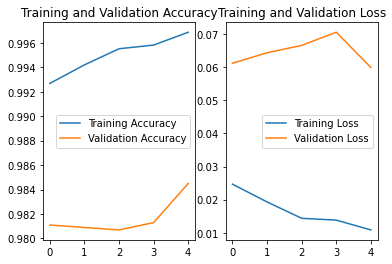

In [11]:
from matplotlib import pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 应用程序，给图识物

In [24]:
from PIL import Image
import numpy as np

model_save_path = "./class4/MNIST_FC/checkpoint/mnist.ckpt"

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
    
model.load_weights(model_save_path)

for i in range(10):
    # 循环识别所有图片
    image_path = "./class4/MNIST_FC/" + str(i) + ".png"
    print(image_path)
    img = Image.open(image_path)
    
    # 进行预处理
    # 转化为28*28的小图，并转成灰度图
    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))
    
    # 训练集是黑底白字，测试是白底黑字，所以颜色取反。这里和下面取一个做就行。
    # img_arr = 255 - img_arr
    
    # 可以使用以下代码提高图片对比度到极致
    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0
                
    img_arr = img_arr / 255.0
    print("img_arr:",img_arr.shape)
    
    # 输入需要是(图片总数，宽，高)的格式，所以人为添加一个图片总数。
    x_predict = img_arr[tf.newaxis, ...]
    print("x_predict:",x_predict.shape)
    result = model.predict(x_predict)
    print(result)
    pred = tf.argmax(result, axis=1)
    
    tf.print(pred)
    print('\n')

./class4/MNIST_FC/0.png
img_arr: (28, 28)
x_predict: (1, 28, 28)
[[8.2527089e-01 2.7879037e-06 4.0088333e-05 4.3231152e-10 1.9182038e-03
  3.3009192e-04 4.9146940e-03 2.1671095e-04 6.6035762e-05 1.6724063e-01]]
[0]


./class4/MNIST_FC/1.png
img_arr: (28, 28)
x_predict: (1, 28, 28)
[[1.1132483e-08 9.9948126e-01 5.6100833e-07 6.7488071e-07 4.6845744e-04
  7.7796731e-06 4.0511654e-06 2.3030063e-05 6.0645498e-06 8.2550350e-06]]
[1]


./class4/MNIST_FC/2.png
img_arr: (28, 28)
x_predict: (1, 28, 28)
[[1.2206207e-08 8.3472141e-06 9.6442741e-01 1.4216542e-02 3.9667852e-06
  1.3761855e-04 1.4894153e-08 2.1161381e-02 3.8065074e-05 6.5546783e-06]]
[2]


./class4/MNIST_FC/3.png
img_arr: (28, 28)
x_predict: (1, 28, 28)
[[3.4041118e-13 6.1069955e-11 3.1129406e-07 9.9963760e-01 6.9293779e-11
  1.5125230e-04 2.4022396e-12 6.2914318e-09 6.9687980e-05 1.4110545e-04]]
[3]


./class4/MNIST_FC/4.png
img_arr: (28, 28)
x_predict: (1, 28, 28)
[[2.7611177e-06 7.6275223e-06 6.4276387e-03 4.3290338e-06 9.7365719

## Fashion dataset example

### Train model

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


os.chdir("D:\Programming\python\Tensorflow Tutorial\class4\FASHION_FC")

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 最后的 1 是单通道数据，是灰度值
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度,从(60000, 28, 28)reshape为(60000, 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/fashion.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_save_path,
                                                 save_weights_only = True,
                                                 save_best_only = True)

# callbacks = [cp_callback] 会使 model.fit() 执行后调用这个函数进行储存
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test), validation_freq = 1,
                    callbacks = [cp_callback])
model.summary()

-------------load the model-----------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2011 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.3488 - val_sparse_categorical_accuracy: 0.8811
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1981 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.3583 - val_sparse_categorical_accuracy: 0.8787
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1924 - sparse_categorical_accuracy: 0.9285 - val_loss: 0.3722 - val_sparse_categorical_accuracy: 0.8793
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1862 - sparse_categorical_accuracy: 0.9305 - val_loss: 0.3483 - val_sparse_categorical_accuracy: 0.8892
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1803 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.3546 - val_sparse_cate

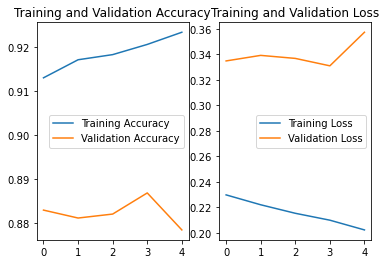

In [33]:
from matplotlib import pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Test the model

In [43]:
from PIL import Image
import numpy as np
import glob

model_save_path = "./checkpoint/fashion.ckpt"

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
    
model.load_weights(model_save_path)

for file in glob.glob("*.jpeg"):
    # 循环识别所有图片
    img = Image.open(file)
    
    # 进行预处理
    # 转化为28*28的小图，并转成灰度图
    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))
    
    # 训练集是黑底白字，测试是白底黑字，所以颜色取反。这里和下面取一个做就行。
    # img_arr = 255 - img_arr
    
    # 可以使用以下代码提高图片对比度到极致
    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0
                
    img_arr = img_arr / 255.0
    print("img_arr:",img_arr.shape)
    
    # 输入需要是(图片总数，宽，高)的格式，所以人为添加一个图片总数。
    x_predict = img_arr[tf.newaxis, ...]
    print("x_predict:", x_predict.shape)
    result = model.predict(x_predict)
    print(result)
    pred = tf.argmax(result, axis=1)
    
    tf.print(pred)
    print('\n')

img_arr: (28, 28)
x_predict: (1, 28, 28)
[[3.6271176e-01 7.8696063e-09 1.4920788e-03 1.2413437e-06 5.0025224e-05
  1.5177339e-12 6.3572693e-01 9.9024792e-15 1.7956210e-05 4.1407822e-11]]
[6]


img_arr: (28, 28)
x_predict: (1, 28, 28)
[[1.5763607e-09 9.9999952e-01 2.5978469e-11 4.2570593e-07 4.9734167e-10
  1.0698975e-20 2.0269509e-08 2.1641141e-21 2.4519518e-15 5.4540840e-23]]
[1]


img_arr: (28, 28)
x_predict: (1, 28, 28)
[[1.6074850e-08 9.3376376e-11 6.1756015e-01 7.9127443e-07 3.8243657e-01
  1.6017358e-17 1.7187785e-06 6.1797521e-15 7.4045948e-07 5.0246228e-14]]
[2]


img_arr: (28, 28)
x_predict: (1, 28, 28)
[[1.8471545e-16 2.4581182e-08 1.0605775e-09 9.9999940e-01 5.6299200e-08
  8.0874860e-19 9.0018976e-10 7.1034846e-16 5.8693985e-07 4.2781801e-17]]
[3]


img_arr: (28, 28)
x_predict: (1, 28, 28)
[[8.1785238e-06 1.5076422e-08 7.9346053e-02 3.0785341e-13 9.1185379e-01
  1.3671915e-09 8.7403897e-03 6.0748672e-13 5.1638326e-05 6.4833507e-12]]
[4]


img_arr: (28, 28)
x_predict: (1, 28